import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
from sklearn.metrics import r2_score

Define constansts for use:

In [ ]:
OE_AVG_EMISS_UNC = 0.015 #median OE LSE uncertainty for band 14.
MOD21_AVG_EMISS_UNC = 0.0131 #Converted from Percentage 1.31% value from NASA General Accuraccy statement: https://modis-land.gsfc.nasa.gov/ValStatus.php?ProductID=MOD21

Import the data for the Southern Great Plains (SGP) site including:
- In situ LST
- MOD21 LST
- MOD21 Emissivity for the 11 micron channel
- OE LST retrieved from ASTER
- OE emissivity retrived from the 11 micron channel on ASTER

In [2]:
ds = pd.read_excel("Datasets\SGP\SGP.xlsx")

Calulate the R^2 values for the two intercomparisions using scikit-learns "r2_score" method from the "metrics" class.

In [3]:
oe_vs_mod21_r2 = r2_score(ds["MOD21 LST"], ds["OE_LST"])
oe_vs_insitu_r2 = r2_score(ds["SGP_Val"][5:-1], ds["OE_LST"][5:-1])

Figure 8 code below:

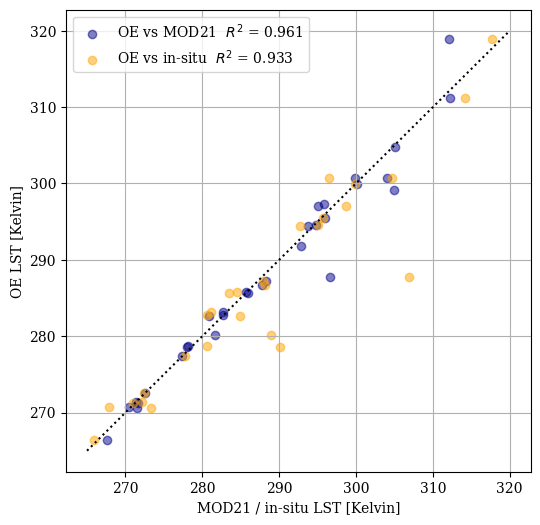

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams["font.family"] = "Serif"
oe_vs_mod21 = ax.scatter(x=ds["MOD21 LST"],y=ds["OE_LST"],color="DarkBlue",alpha=0.5,label=f"OE vs MOD21  $R^2$ = {oe_vs_mod21_r2:.3f}")
oe_vs_insitu = ax.scatter(x=ds["SGP_Val"],y=ds["OE_LST"],color="Orange",alpha=0.5, label=f"OE vs in-situ  $R^2$ = {oe_vs_insitu_r2:.3f}")
ax.plot([265,320],[265,320],linestyle="dotted",color="black")
ax.set_ylabel("OE LST [Kelvin]")
ax.set_xlabel("MOD21 / in-situ LST [Kelvin]")
ax.grid(True)
ax.legend(handles=[oe_vs_mod21,oe_vs_insitu])

Calculate the difference between ASTER OE LSE band 14 and MODIS MOD21 LSE band 31 as they are the closest spectral match between the two instruments.

In [21]:
emissivity_diff = ds["OE_Emis14"] - ds["MOD21_Emis31"]

Figure 10 code below:

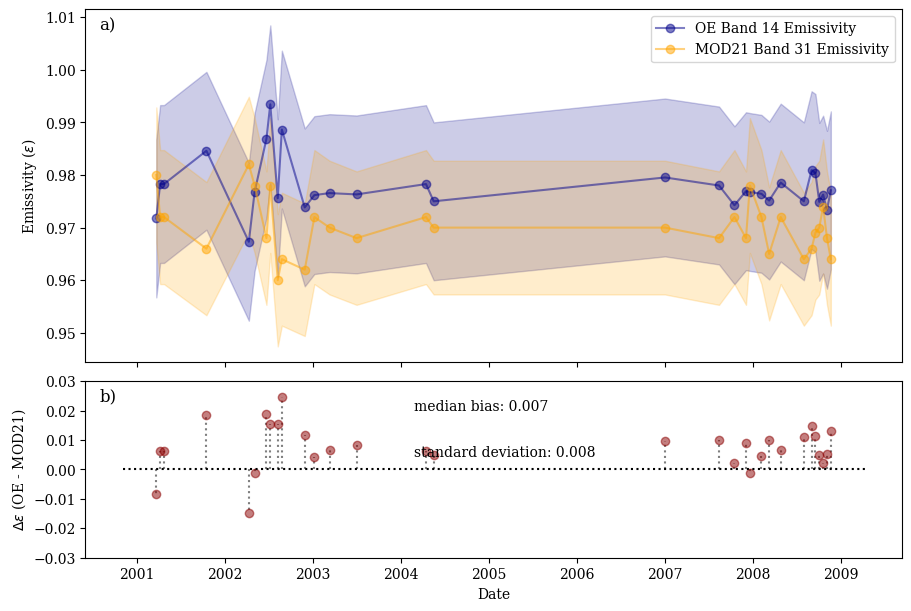

In [22]:
fig, axs = plt.subplot_mosaic(figsize=(9,6),mosaic=[['a)', 'a)'], ['a)','a)'],['b)', 'b)']],layout='constrained')
plt.rcParams["font.family"] = "Serif"
axs["a)"].fill_between(ds["Date"],  ds["OE_Emis14"]-OE_AVG_EMISS_UNC,  ds["OE_Emis14"]+OE_AVG_EMISS_UNC, color="DarkBlue",alpha=0.2)
axs["a)"].fill_between(ds["Date"], ds["MOD21_Emis31"]-(ds["MOD21_Emis31"]*MOD21_AVG_EMISS_UNC),ds["MOD21_Emis31"]+(ds["MOD21_Emis31"]*MOD21_AVG_EMISS_UNC),color="Orange",alpha=0.2)
oe_emiss = axs["a)"].plot(ds["Date"],ds["OE_Emis14"],"o-",color="DarkBlue",alpha=0.5,label="OE Band 14 Emissivity")
mod21_emiss = axs["a)"].plot(ds["Date"],ds["MOD21_Emis31"],"o-",color="Orange",alpha=0.5,label="MOD21 Band 31 Emissivity")
axs["a)"].set_ylabel("Emissivity ($ε$)",fontfamily="serif")
axs["a)"].legend()

#oe_minus_mod21_emiss = axs["b)"].plot(ds["Date"],emissivity_diff,"o-",color="DarkRed",alpha=0.5)
(markers, stemlines, baseline) = axs["b)"].stem(ds["Date"],emissivity_diff)
baseline.set_alpha(0)
stemlines.set_color('black')
stemlines.set_alpha(0.5)
stemlines.set_linestyle(":")
markers.set_color("DarkRed")
markers.set_alpha(0.5)
axs["b)"].set_ylim(bottom=-0.03,top=0.03)
date_range = axs["b)"].get_xlim()
axs["b)"].plot(date_range,[0,0],linestyle="dotted",color="black")
axs["b)"].set_ylabel("$Δε$ (OE - MOD21)")
axs["b)"].set_xlabel("Date")

axs["a)"].sharex(axs["b)"])
axs["a)"].tick_params('x', labelbottom=False)

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
axs["b)"].text(0.7,0.3,f"median bias: {np.median(emissivity_diff):.3f}",transform=ax.transAxes + trans,verticalalignment="bottom")
axs["b)"].text(0.7,0.2,f"standard deviation: {np.std(emissivity_diff):.3f}",transform=ax.transAxes + trans,verticalalignment="bottom")
for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,fontsize='large', verticalalignment='top')

Import the data for the Desert Rock (DR) site including:
- In situ LST
- MOD21 LST
- MOD21 Emissivity for the 11 micron channel
- OE LST retrieved from ASTER
- OE emissivity retrived from the 11 micron channel on ASTER

In [23]:
ds = pd.read_excel("Datasets\DR\DR.xlsx")

Calulate the R^2 values for the two intercomparisions using scikit-learns "r2_score" method from the "metrics" class.

In [ ]:

oe_vs_mod21_r2 = r2_score(ds["MOD21 LST"], ds["OE_LST"])
oe_vs_insitu_r2 = r2_score(ds["SGP_Val"][5:-1], ds["OE_LST"][5:-1])

Figure 9 code below:

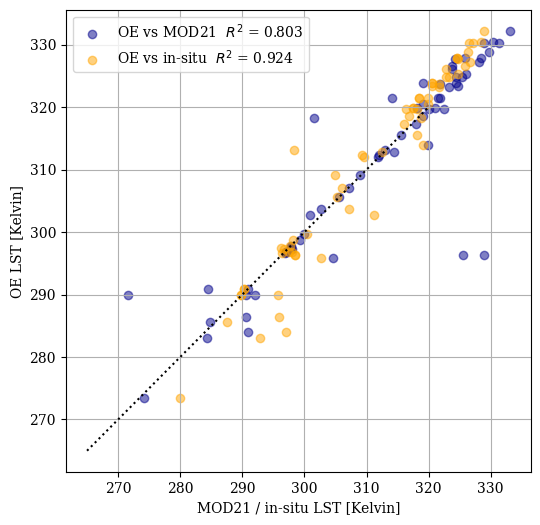

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams["font.family"] = "Serif"
oe_vs_mod21 = ax.scatter(x=ds["MOD21 LST"],y=ds["OE_LST"],color="DarkBlue",alpha=0.5,label=f"OE vs MOD21  $R^2$ = {oe_vs_mod21_r2:.3f}")
oe_vs_insitu = ax.scatter(x=ds["SGP_Val"],y=ds["OE_LST"],color="Orange",alpha=0.5, label=f"OE vs in-situ  $R^2$ = {oe_vs_insitu_r2:.3f}")
ax.plot([265,320],[265,320],linestyle="dotted",color="black")
ax.set_ylabel("OE LST [Kelvin]")
ax.set_xlabel("MOD21 / in-situ LST [Kelvin]")
ax.grid(True)
ax.legend(handles=[oe_vs_mod21,oe_vs_insitu])

Calculate the difference between ASTER OE LSE band 14 and MODIS MOD21 LSE band 31 as they are the closest spectral match between the two instruments.

In [25]:
emissivity_diff = ds["OE_Emis14"] - ds["MOD21_Emis31"]

Figure 11 code below:

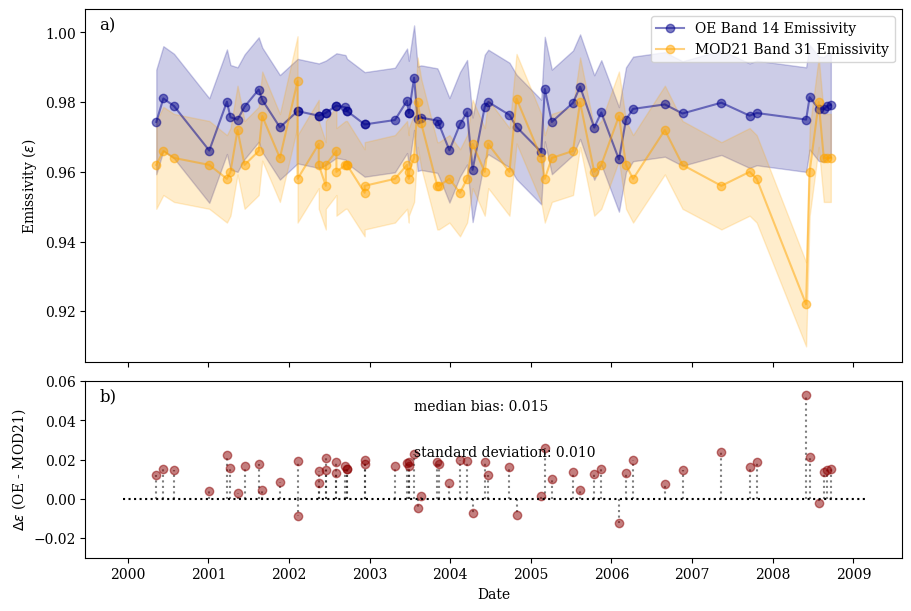

In [10]:
fig, axs = plt.subplot_mosaic(figsize=(9,6),mosaic=[['a)', 'a)'], ['a)','a)'],['b)', 'b)']],layout='constrained')
plt.rcParams["font.family"] = "Serif"
axs["a)"].fill_between(ds["Date"],  ds["OE_Emis14"]-OE_AVG_EMISS_UNC,  ds["OE_Emis14"]+OE_AVG_EMISS_UNC, color="DarkBlue",alpha=0.2)
axs["a)"].fill_between(ds["Date"], ds["MOD21_Emis31"]-(ds["MOD21_Emis31"]*MOD21_AVG_EMISS_UNC),ds["MOD21_Emis31"]+(ds["MOD21_Emis31"]*MOD21_AVG_EMISS_UNC),color="Orange",alpha=0.2)
oe_emiss = axs["a)"].plot(ds["Date"],ds["OE_Emis14"],"o-",color="DarkBlue",alpha=0.5,label="OE Band 14 Emissivity")
mod21_emiss = axs["a)"].plot(ds["Date"],ds["MOD21_Emis31"],"o-",color="Orange",alpha=0.5,label="MOD21 Band 31 Emissivity")
axs["a)"].set_ylabel("Emissivity ($ε$)",fontfamily="serif")
axs["a)"].legend()

#oe_minus_mod21_emiss = axs["b)"].plot(ds["Date"],emissivity_diff,"o-",color="DarkRed",alpha=0.5)
(markers, stemlines, baseline) = axs["b)"].stem(ds["Date"],emissivity_diff)
baseline.set_alpha(0)
stemlines.set_color('black')
stemlines.set_alpha(0.5)
stemlines.set_linestyle(":")
markers.set_color("DarkRed")
markers.set_alpha(0.5)
axs["b)"].set_ylim(bottom=-0.03,top=0.06)
date_range = axs["b)"].get_xlim()
axs["b)"].plot(date_range,[0,0],linestyle="dotted",color="black")
axs["b)"].set_ylabel("$Δε$ (OE - MOD21)")
axs["b)"].set_xlabel("Date")

axs["a)"].sharex(axs["b)"])
axs["a)"].tick_params('x', labelbottom=False)

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
axs["b)"].text(0.7,0.3,f"median bias: {np.median(emissivity_diff):.3f}",transform=ax.transAxes + trans,verticalalignment="bottom")
axs["b)"].text(0.7,0.2,f"standard deviation: {np.std(emissivity_diff):.3f}",transform=ax.transAxes + trans,verticalalignment="bottom")
for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,fontsize='large', verticalalignment='top')